# Chapter 3 Applied Labs

## Q10 (Multiple linear regression on the `Carseats` dataset)



In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
# import pandas as pd
import statsmodels.stats.anova
# import numpy as np

# %matplotlib inline

# sns.set(style="whitegrid")

### (a) Fit a multiple regression model to predict `Sales` using `Price`, `Urban`, and `US`

In [2]:
carseats = sm.datasets.get_rdataset("Carseats", "ISLR").data
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
# statsmodels doesn't assume there'll be an intercept, so you have to add one
X_train =  sm.add_constant(carseats)

model = smf.ols(f"Sales ~ Price + Urban + US", data=carseats) # statsmodels, like R, should handle the encoding.
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Thu, 16 May 2019   Prob (F-statistic):           2.39e-23
Time:                        18:58:28   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036   

/home/will/.local/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### (b) Provide an interpretation of each coefficient in the model

- The intercept of 13.0 is significant, and gives the sales at a price of 0 and with `Urban="No"`, `US="No"`.
- `Urban` has a coefficient of -0.02 but is not significant
- `US` has a positive coefficient - `Sales` goes up by 1.2 units for a given value of `Price` and `Urban` held fixed, if the carseat has `US="Yes"`.
- `Price` has a negative coefficient - as `Price`





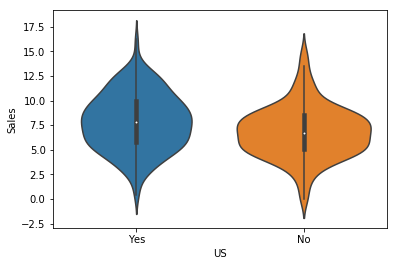

In [4]:
sns.violinplot("US", "Sales", data=carseats)


### (c) write out the model in equation form

`y = Sales, x1 = Price, x2 = 1 if Urban == "Yes" else 0, x3 = 1 if US == "Yes" else 0`

$\beta_0, \beta_1, \beta_2, \beta_3$ are the coefficients

Then the model is:

$$ y = \beta_0 + \beta_1 \cdot x_{1} + \begin{cases} 
  \beta_2  \quad \textrm{if } x_2 == \textrm{"Yes" and }  x_3 \neq \textrm{"Yes"}  \\
  \beta_3  \quad \textrm{if } x_2 \neq \textrm{"Yes" and }  x_3 == \textrm{"Yes"}  \\
  \beta_2 + \beta_3  \quad \textrm{if } x_2 == \textrm{"Yes" and }  x_3 == \textrm{"Yes"}  \\
\end{cases}$$


### (d) For which of the predictors can you reject the null hypothesis $H_0: \beta_j = 0$?

For the coefficients associated with the intercept, price, and US we can reject the null hypothesis

### (e) On the basis of (d), fit a smaller model using only the significant predictors

In [5]:
smaller_model = smf.ols(f"Sales ~ Price + US", data=carseats)
smaller_results = smaller_model.fit()
print(smaller_results.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Thu, 16 May 2019   Prob (F-statistic):           2.66e-24
Time:                        18:58:28   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

### (f) How well do the models in (a) and (e) fit the data?

Equally well - both models have the same R^2, however (e) is the better model as it has fewer degrees of freedom. We can check this using the ANOVA test:

In [6]:
statsmodels.stats.anova.anova_lm(smaller_model.fit(), model.fit())

/home/will/.local/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/will/.local/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/will/.local/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,397.0,2420.874462,0.0,NaN,NaN,NaN
1,396.0,2420.834671,1.0,0.03979,0.006509,0.935739


### (g) using the model from (e), obtain 95% confidence intervals for the coefficients

In [7]:
smaller_results.conf_int()

,0,1
Intercept,11.79032,14.271265
US[T.Yes],0.69152,1.707766
Price,-0.06476,-0.044195


### (h) Is there any evidence of outliers or high leverage observations?

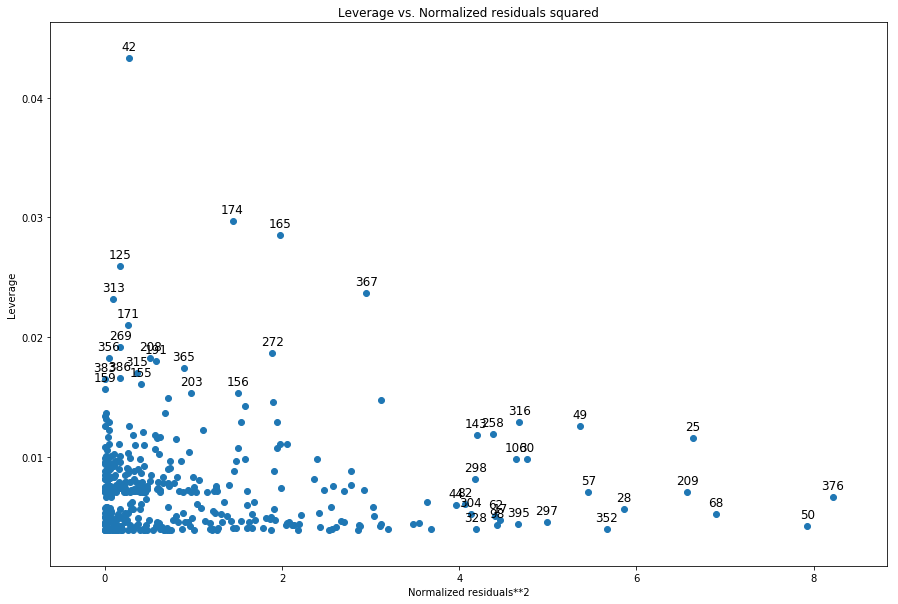

In [8]:
fig, ax = plt.subplots(figsize=(15,10))
fig = sm.graphics.plot_leverage_resid2(smaller_results, ax=ax)

Observation 42 has unusually high leverage, but doesn't have a high residual so is unlikely to be an outlier. Points 376, 50, 68, 209, and 25 have high residuals

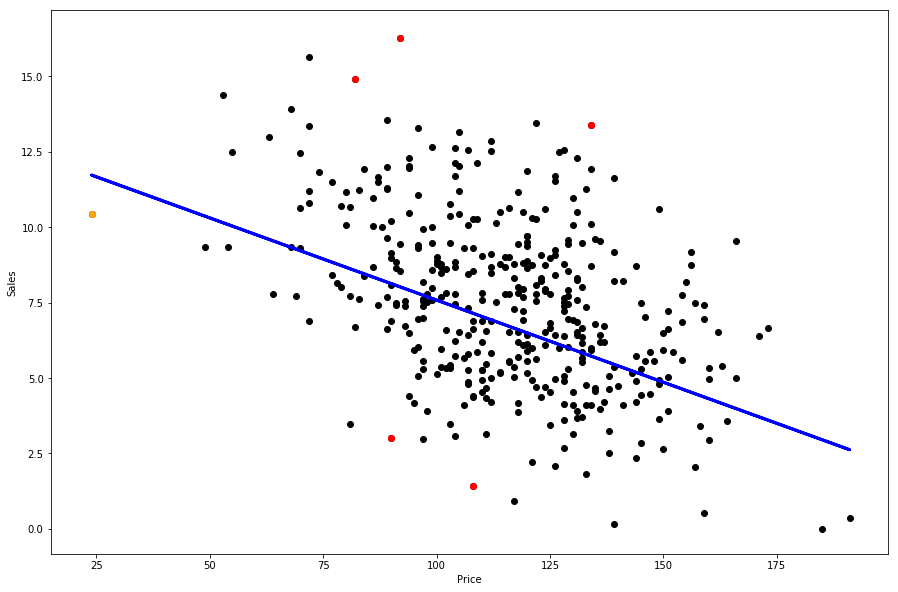

In [11]:
B0, B1, B2 = smaller_results.params

fig, ax = plt.subplots(figsize=(15,10))
plt.scatter(carseats.Price, carseats.Sales,  color='black')
plt.plot(carseats.Price, B0 + B2*carseats.Price, color='blue', linewidth=3) # This excludes the effects of "US"
plt.xlabel("Price")
plt.ylabel("Sales")

high_leverage_indices = [42]
high_residual_indices = [25,50,68,209, 376]

plt.scatter(carseats.Price.iloc[high_leverage_indices], carseats.Sales.iloc[high_leverage_indices], color='orange')
plt.scatter(carseats.Price.iloc[high_residual_indices], carseats.Sales.iloc[high_residual_indices], color='red')
plt.show()